### **Flight Delay Predictor**
**Goal:** Predict if a flight will be delayed based on features like airline, departure time,
weather, and airport.

**Install Required Libraries**

In [27]:
!pip install pandas scikit-learn matplotlib seaborn

**Load the Flight Dataset**

you could use a dataset like
Flight Delay Prediction Dataset on Kaggle or simulate your own:

In [44]:
import pandas as pd
import numpy as np

# Simulated flight data
data = {
    'airline': np.random.choice(['Delta', 'United', 'American', 'JetBlue'], 1000),
    'origin': np.random.choice(['JFK', 'LAX', 'ORD', 'ATL'], 1000),
    'destination': np.random.choice(['SFO', 'MIA', 'DFW', 'SEA'], 1000),
    'scheduled_departure': np.random.randint(0, 24, 1000),  # Hour of day
    'distance': np.random.randint(200, 3000, 1000),
    'departure_delay': np.random.normal(loc=0, scale=30, size=1000),  # Minutes
}

df = pd.DataFrame(data)

# Create a binary target: delayed if dep_delay > 15 min
df['delayed'] = (df['departure_delay'] > 15).astype(int)

df.head()

,airline,origin,destination,scheduled_departure,distance,departure_delay,delayed
0,American,ORD,SEA,5,1100,5.882028,0
1,American,JFK,DFW,3,219,17.064703,1
2,Delta,ATL,MIA,12,553,-14.152134,0
3,United,ATL,DFW,16,2772,13.797520,0
4,American,ATL,SEA,12,938,50.764031,1


**Encode Categorical Features**

In [45]:
# One-hot encode airline, origin, destination
df_encoded = pd.get_dummies(df, columns=['airline', 'origin', 'destination'])
# Drop raw delay column (used only for creating labels)
df_encoded.drop('departure_delay', axis=1, inplace=True)

**Split into Features and Target**

In [46]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('delayed', axis=1)
y = df_encoded['delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train a Gradient Boosting Classifier**

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

**Predict and Evaluate**

Accuracy: 0.685

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.81       144
           1       0.27      0.07      0.11        56

    accuracy                           0.69       200
   macro avg       0.49      0.50      0.46       200
weighted avg       0.59      0.69      0.61       200



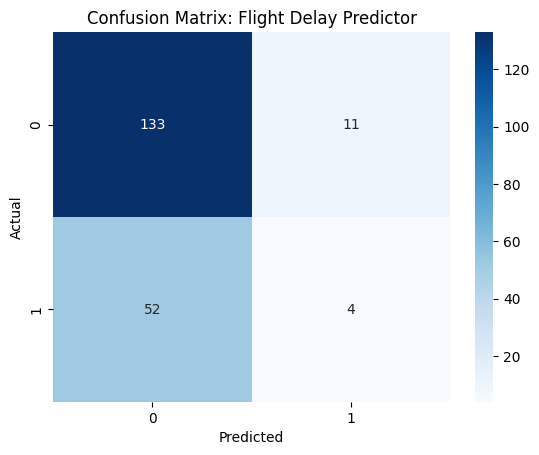

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Flight Delay Predictor")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Feature Importance**

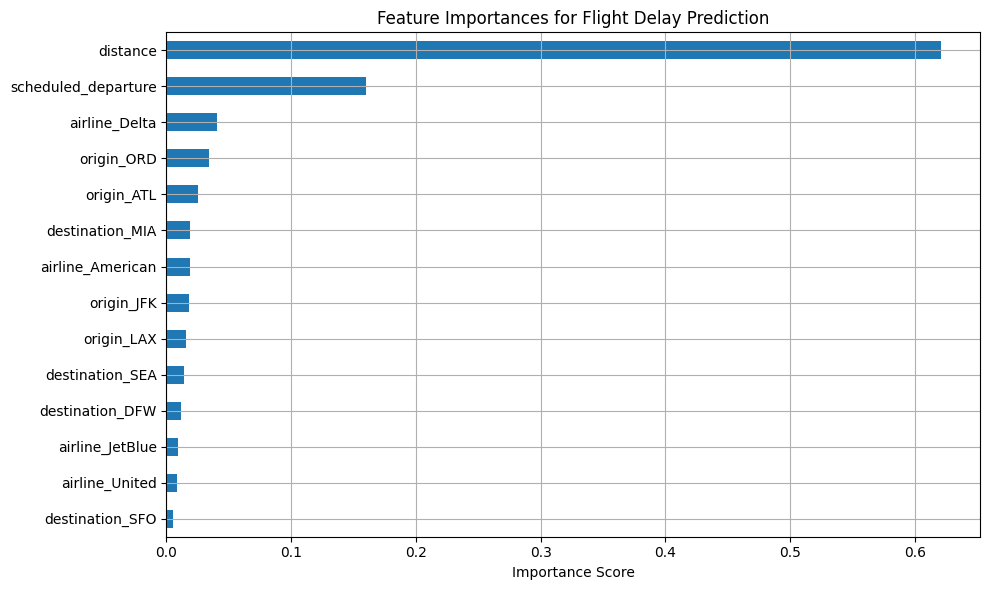

In [43]:
# Plot top features
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(10, 6))
feat_imp.plot(kind='barh')
plt.title("Feature Importances for Flight Delay Prediction")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

**Summary**

*  **Dataset:** Simulated or real-world flight data
* **Model:** Gradient Boosting Classifier (can replace with XGBoost)
*  **Target:** Binary classification (delayed or not)
*  **Features**: Airline, airport, departure time, distance